In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec


import matplotlib.dates as mdates

params = {'text.latex.preamble': '\\usepackage{lmodern}',
          'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

In [2]:
datos = pd.read_csv("../data/sensores.csv",index_col=0,parse_dates=True)

In [3]:
def plot_co2(sensores,fecha1="2021-09-23 13:20",deltat="1H",
             lista=['fluke',"s8lp","scd30","sen0220"],
             ymin=300,ymax=500,calibracion=False,savefig=False):
    fig, ax = plt.subplots(figsize=(5,2.5),constrained_layout=True)

    fecha1 = parse(fecha1) 
    fecha2 = fecha1 + pd.Timedelta(deltat)
    
    color = {"s8lp":"b","sen0220":"g","scd30":'r','fluke':'k-'}
#     trans = {"s8lp":1 ,"sen0220":1 ,"scd30":1}
    for sensor in lista:
        if sensor=="fluke":
            etiqueta = "Fluke"
        else:
            etiqueta = sensor.upper()
        ax.plot(sensores[sensor],color[sensor],label=etiqueta)
    

    ax.fill_between(sensores.fluke.index,sensores.fluke+50,sensores.fluke-50,alpha=0.2,color='k')

    ax.set_ylim(ymin,ymax)
    ax.set_ylabel("CO2 [ppm]")
    ax.set_xlabel("Time [mm-dd HH]")
    ax.set_yticks(np.arange(ymin-50,ymax+50,50))
    # ax.set_title("Mediciones CO2")
    ax.legend()
    ax.set_xlim(fecha1,fecha2)
    ax.grid()
    
    if savefig:
        fig.savefig("../img/history.pdf",dpi=300)
        print("se guardo una figura")
    if calibracion:
        return sensores[fecha1:fecha2]

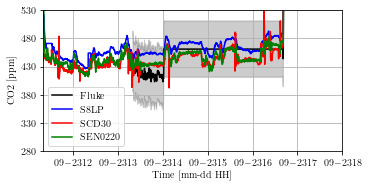

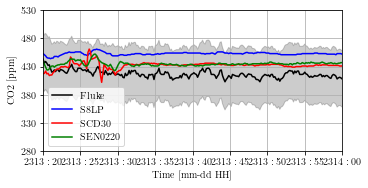

In [4]:
fecha1 = "2021-09-23 11:20"
ymin = 330
ymax = 500
plot_co2(datos,fecha1=fecha1,deltat="400Min",ymin=ymin,ymax=ymax)
calibra430 = plot_co2(datos,fecha1="2021-09-23 13:20",deltat="40Min",
                      ymin=ymin,ymax=ymax,
                      calibracion=True)

se guardo una figura


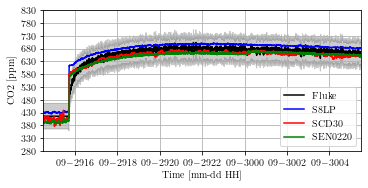

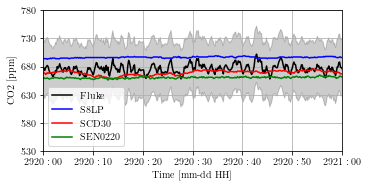

In [5]:
plot_co2(datos,fecha1="2021-09-29 14:30",deltat="15H",ymin=330,ymax=800)
calibra650 = plot_co2(datos,fecha1="2021-09-29 20:00",deltat="1H",ymin=580,ymax=780,calibracion=True,savefig=True)

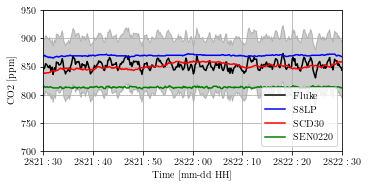

In [6]:
fecha1 = "2021-09-28 14:30"
ymin = 400
ymax = 950
# plot_co2(sensores,fecha1=fecha1,deltat="20H",ymin=ymin,ymax=ymax)

fecha1 = "2021-09-28 21:30"
ymin=750
calibra850 = plot_co2(datos,fecha1=fecha1,deltat="1H",ymin=ymin,ymax=ymax,calibracion=True)

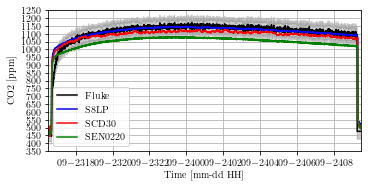

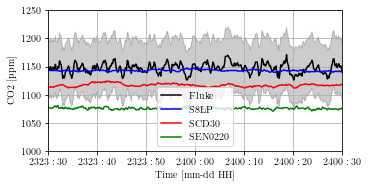

In [7]:
fecha1 = "2021-09-23 16:30"
ymin = 400
ymax = 1250
plot_co2(datos,fecha1=fecha1,deltat="17H",ymin=ymin,ymax=ymax)

fecha1 = "2021-09-23 23:30"
ymin=1050
calibra1150 = plot_co2(datos,fecha1=fecha1,deltat="1H",ymin=ymin,ymax=ymax,calibracion=True)

In [8]:
calibra = pd.concat([calibra430,calibra650,calibra850,calibra1150],axis=0)


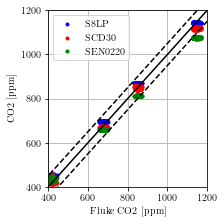

In [9]:
lista=["s8lp","scd30","sen0220"]
color = {"s8lp":"b","sen0220":"g","scd30":'r','fluke':'k'}
# color = {"s8lp":"b-","sen0220":"g-","scd30":'r-','fluke':'k-'}

fig, ax = plt.subplots(figsize=(3,3),constrained_layout=True)
X = np.linspace(300,1200,2)
for sensor in lista:
    if sensor=="fluke":
        etiqueta = "Fluke"
    else:
        etiqueta = sensor.upper()
    
        
    ax.scatter(calibra['fluke'],calibra[sensor],c=color[sensor],marker=".",label=etiqueta)

ax.plot(X,X,'k-')
ax.plot(X,X+50,'k--')
ax.plot(X,X-50,'k--')




ax.set_yticks(np.arange(400,1250,200))
ax.set_xticks(np.arange(400,1250,200))
ax.set_xlabel("Fluke CO2 [ppm]")
ax.set_ylabel("CO2 [ppm]")
ax.legend()
ax.set_xlim(400,1200)
ax.set_ylim(400,1200)
ax.grid()
fig.savefig("../img/calibration.pdf",dpi=300)

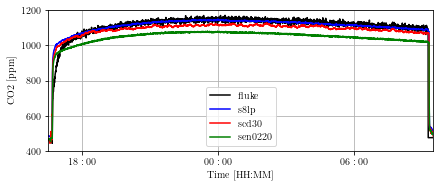

In [10]:
sensors = ['fluke','s8lp','scd30','sen0220']
color = {"s8lp":"b-","sen0220":"g-","scd30":'r-','fluke':'k-'}

fig, ax = plt.subplots(constrained_layout=True,figsize=(6,2.5))

fecha1 = parse("2021-09-23 16:30")
fecha2 = fecha1 + pd.Timedelta("17H")
ax.set_xlim(fecha1,fecha2)

ax.set_ylim(400,1200)
ax.set_yticks(range(400,1201,200))
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("Time [HH:MM]")


ax.grid()


color = {"s8lp":"b-","sen0220":"g-","scd30":'r-','fluke':'k-'}
# trans = {"s8lp":1 ,"sen0220":1 ,"scd30":1}
for sensor in sensors:
    ax.plot(datos[sensor].index,datos[sensor],
            color[sensor],
            label=sensor,
            alpha=1,markevery=1)

# ax.fill_between(datos.fluke.index,datos.fluke+50,datos.fluke-50,alpha=0.2,color='k')

ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))


myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
# fig.savefig("../img/test1100.pdf",dpi=300)